## Step-1 : Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# filter out warning messages
import warnings
warnings.filterwarnings('ignore')

### 1.1 Reading the Dataset

In [3]:
df = pd.read_csv('day.csv')

### 1.2 Inspection of Dataset

In [4]:
# inspecting first 5 rows of data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# inspecting shape
df.shape

(730, 16)

In [6]:
# inspecting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# checking for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# descriptive analysis 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

###### Based on the dataset and the data dictionary available to us ,the following variables can be removed from further analysis:
- instant : Only Index value is provided in this column.
- dteday : This varisble has only date, Since we already have seperate columns for 'year' & 'month',hence, we can remove the column.
- casual & registered :As per the data dictionary given to us both of these columns contains the count of bike booked by different categories of customers. But the goal of the analysis is predicting the demand for shared bikes. Hence we can remove both the columns.

In [10]:
# creating new dataframe with relevant columns ( without instant,date,casual and registered)
df1 = df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed','atemp',
       'cnt']]

In [11]:
# inspecting shape of new dataframe
df1.shape

(730, 12)

## Step 2 : Converting dataset to readable format

In [12]:
#Converting season
df1.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
#Converting mnth
df1.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
#Converting weathersit
df1.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
#Converting weathersit
df1.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [13]:
# converting float values to int
df1.yr = df1.yr.astype('int32')
df1.holiday = df1.holiday.astype('int32')
df1.workingday = df1.workingday.astype('int32')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int32  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int32  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int32  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  atemp       730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int32(3), int64(1), object(4)
memory usage: 60.0+ KB


In [15]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,atemp,cnt
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,80.5833,10.749882,18.18125,985
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,69.6087,16.652113,17.68695,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,9.47025,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,10.60610,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,11.46350,1600


## Step 3 : Data Visualization

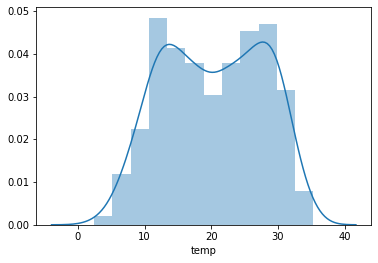

In [16]:
sns.distplot(df1['temp'])
plt.show()

##### Inference:
- Most of the bike rented when the temperature is in the range of 10 degree to 30 degree
- Mostly people rent bikes on the pleasant temperature 

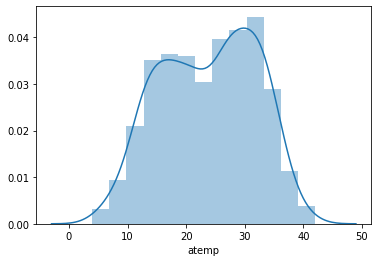

In [17]:
sns.distplot(df['atemp'])
plt.show()

##### Inference:
- Bike renting drastically decrease with temperature going above 35 degrees.

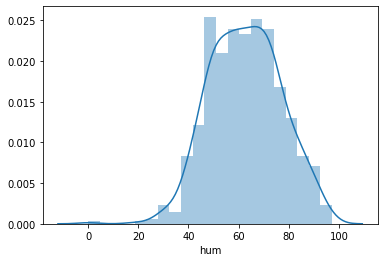

In [18]:
sns.distplot(df1['hum'])
plt.show()

##### Inference:
- With increase in humidity number of bike rented decreases.

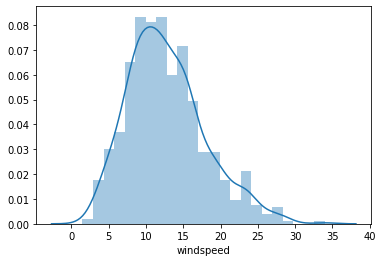

In [19]:
sns.distplot(df1['windspeed'])
plt.show()

##### Inference:
- With increase in windspeed number of bike rented decreases.

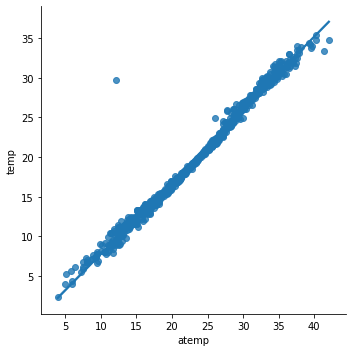

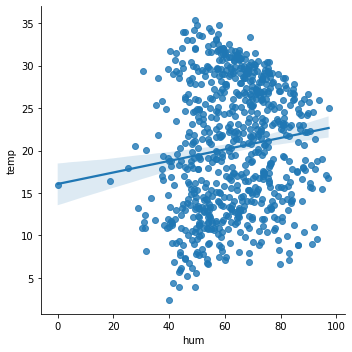

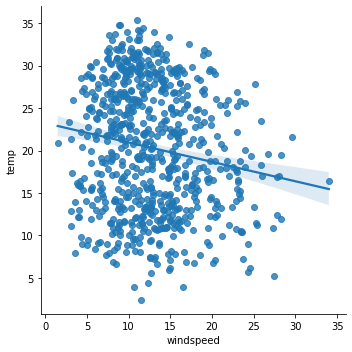

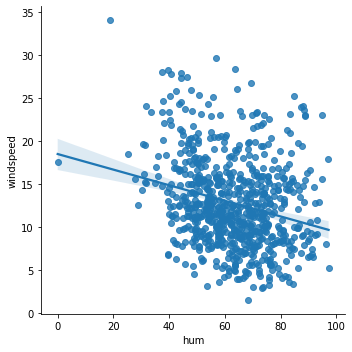

In [20]:
# plot temperature vs feeling tempertature
ax = sns.lmplot(x="atemp", y="temp", data=df1)

# plot humidity vs temperature
ax = sns.lmplot(x="hum", y="temp", data=df1)

# plot windspeed vs temperature
ax = sns.lmplot(x="windspeed", y="temp", data=df1)

# plot humidity vs windspeed
ax = sns.lmplot(x="hum", y="windspeed", data=df1)
plt.show()

##### Inference:
- Variable atemp and temp are highly correlated to each other
- windspeed and humidity show correlation
- there is also some correlation present between humidity and temperature
- we will drop atemp as it is highly correlated to temp

In [21]:
# drop 'atemp'
df1.drop(['atemp'],axis=1,inplace=True)

Text(0, 0.5, 'count')

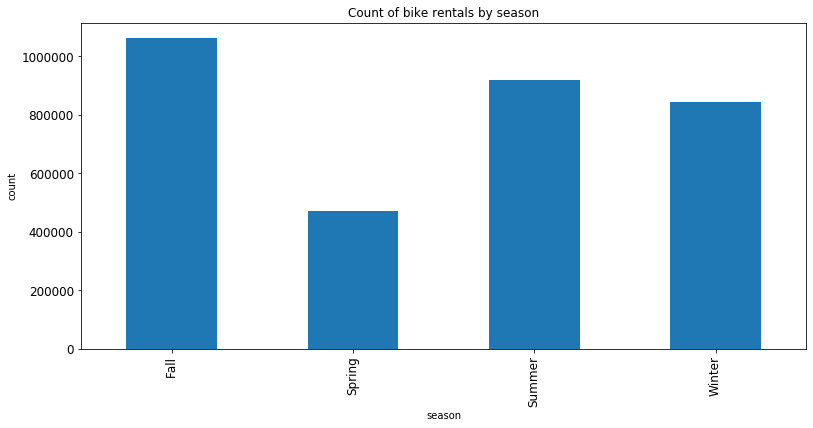

In [22]:
# plot count of bike rentals vs season
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(13,6))
ax = df1[['season','cnt']].groupby(['season']).sum().plot(kind='bar',legend=False,title='Count of bike rentals by season',
                                                    fontsize=12,ax=ax)
ax.set_xlabel('season')
ax.set_ylabel('count')

##### Inference:
- Most of the bikes rented are in the Fall season and least in the Spring season

Text(0, 0.5, 'count')

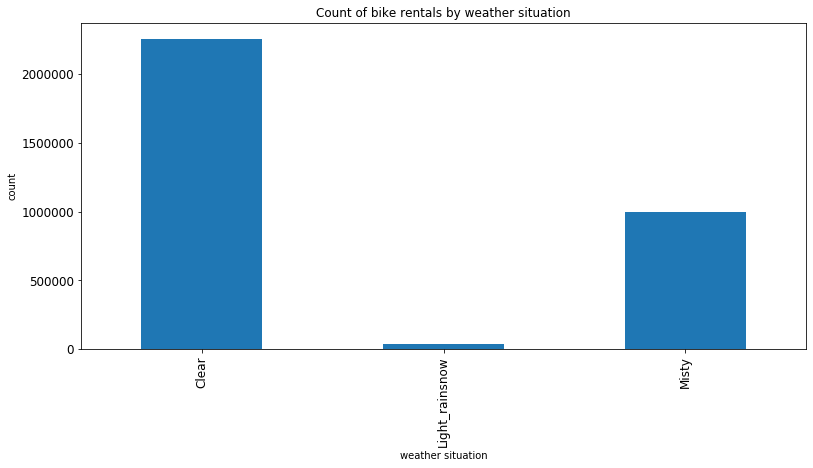

In [23]:
# plot count of bike rentals vs weather situation
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(13,6))
ax = df1[['weathersit','cnt']].groupby(['weathersit']).sum().plot(kind='bar',legend=False,title='Count of bike rentals by weather situation',
                                                    fontsize=12,ax=ax)
ax.set_xlabel('weather situation')
ax.set_ylabel('count')

##### Inference:
- People prefer to rent bikes on a clear day rather than a misty or a day on which there is light rain/snow

Text(0, 0.5, 'count')

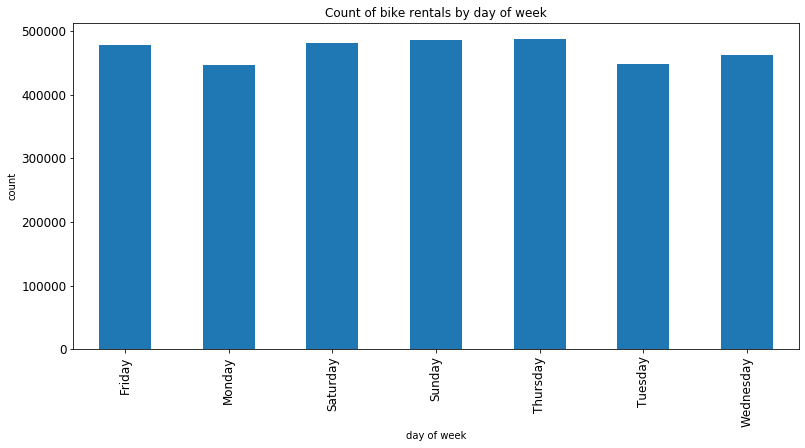

In [24]:
# plot count of bike rentals vs day of the week
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(13,6))
ax = df1[['weekday','cnt']].groupby(['weekday']).sum().plot(kind='bar',legend=False,title='Count of bike rentals by day of week',
                                                    fontsize=12,ax=ax)
ax.set_xlabel('day of week')
ax.set_ylabel('count')

##### Inference:
- Distribution of rented bikes seems to be similar on all days of the week with friday and thursday being at the top

[Text(0, 0, 'Weekend/holiday'), Text(0, 0, 'Working day')]

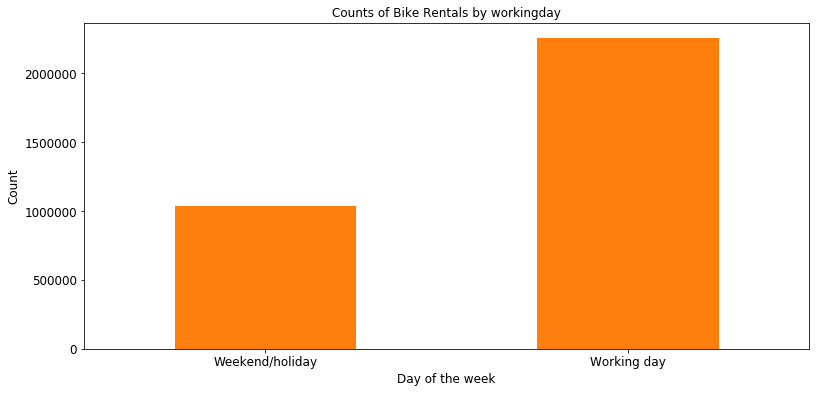

In [25]:
# plot count of bike rentals vs working day
f, ax1=  plt.subplots(nrows=1, ncols=1, figsize=(13, 6))

ax1 = df1[['workingday','cnt']].groupby(['workingday']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by workingday", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("Day of the week", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['Weekend/holiday','Working day'],rotation=0)

##### Inference:
- People rent bikes on a working day rather than a weekend/holiday. This might be because many people travel to work on their rented bikes.

[Text(0, 0, '2018'), Text(0, 0, '2019')]

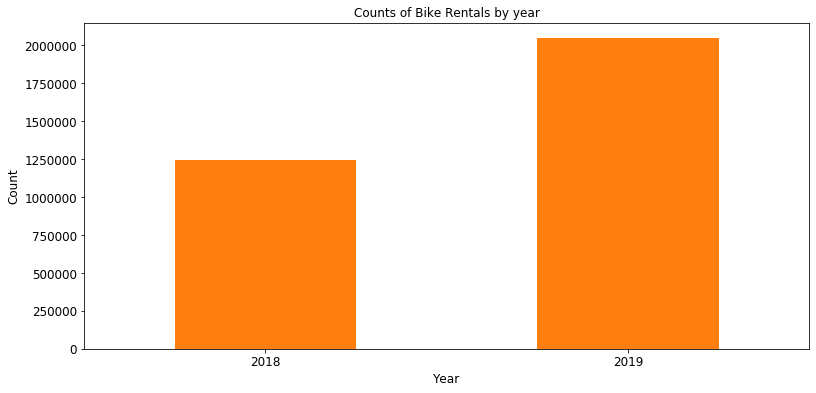

In [26]:
# plot count of bike rentals vs year
f, ax1=  plt.subplots(nrows=1, ncols=1, figsize=(13, 6))

ax1 = df1[['yr','cnt']].groupby(['yr']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by year", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['2018','2019'],rotation=0)

##### Inference:
- The count of rented bikes increased significantly in the year 2019 as compared to 2018

Text(0, 0.5, 'Count')

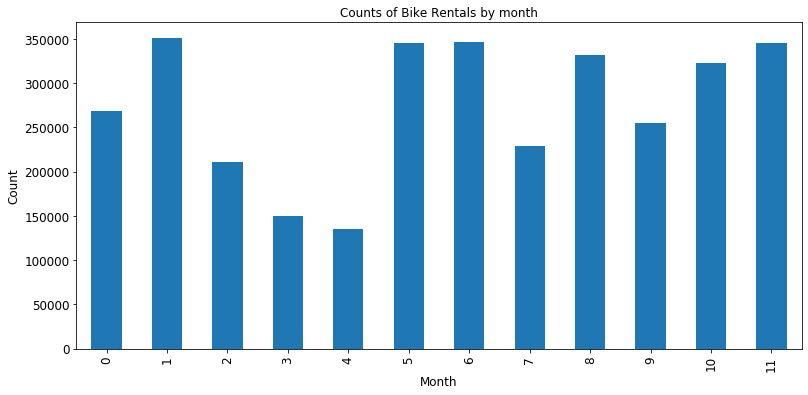

In [27]:
# plot count of bike rentals vs month
f, ax1=  plt.subplots(nrows=1, ncols=1, figsize=(13, 6))

ax1 = df1[['mnth','cnt']].groupby(['mnth']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by month", 
                                         stacked=True, fontsize=12, ax=ax1)  
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

##### Inference:
- The months Feb, Jun , July have the most number of rented bikes
- The months April , May have the least number of rented bikes

##  Data Visualizing variables

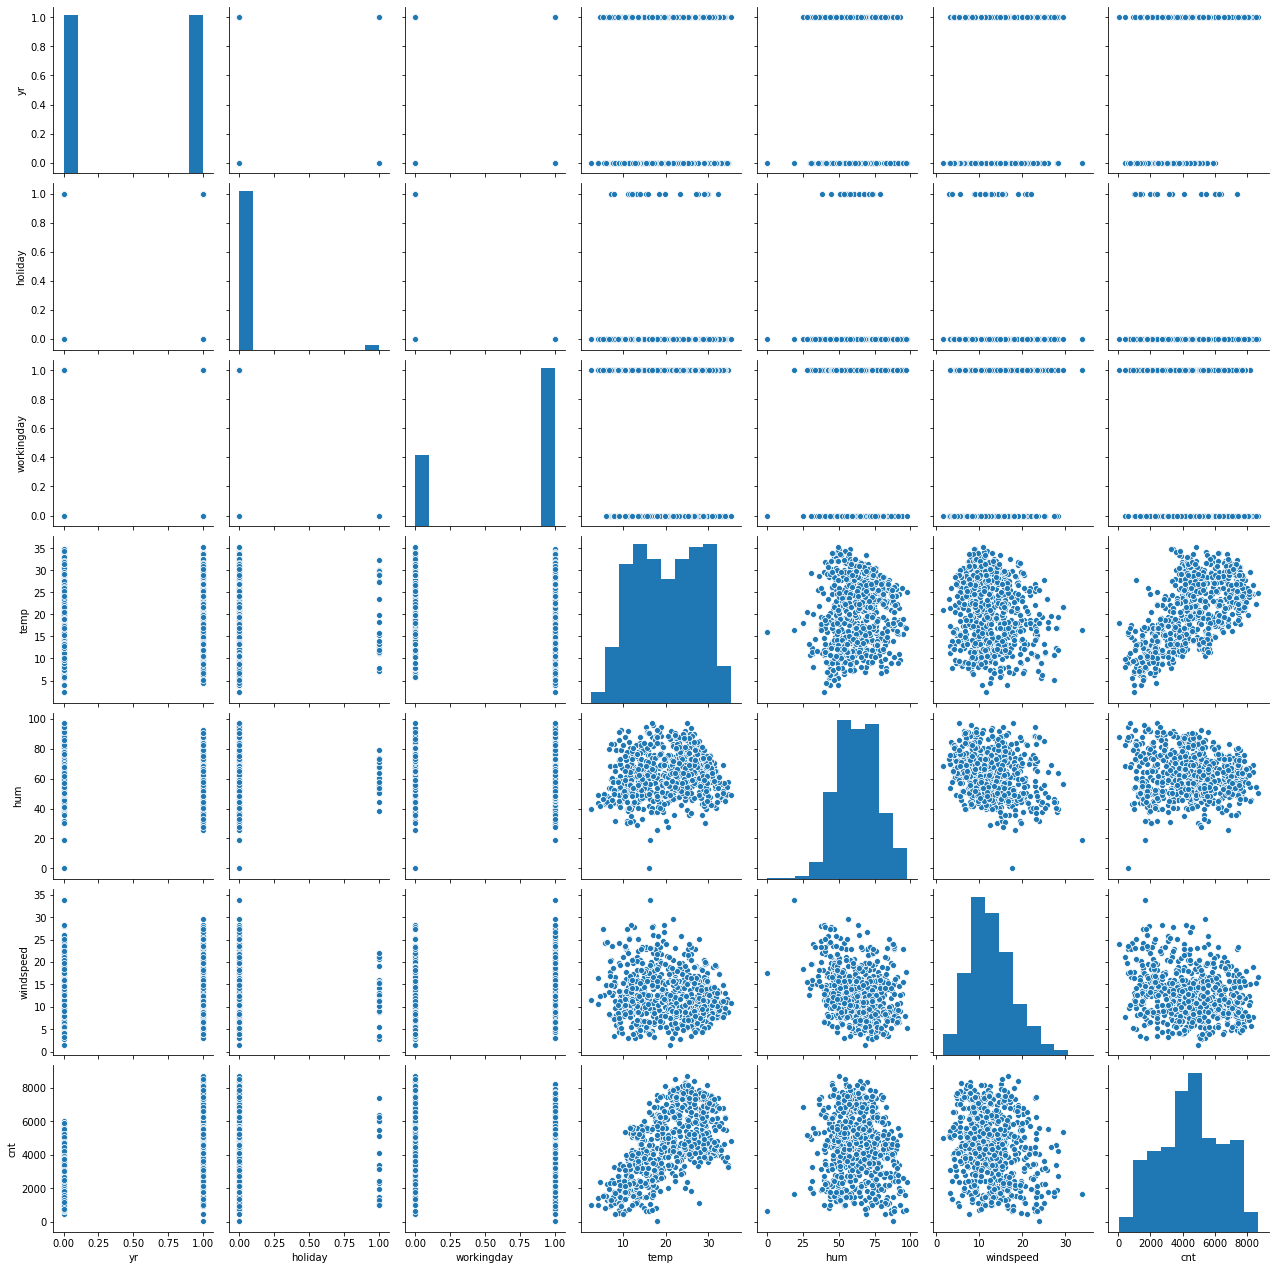

In [28]:
# pairplot for variables
num_vars=df1[[ 'yr', 'holiday', 'workingday', 'temp','hum','windspeed','cnt']]
sns.pairplot(num_vars)
plt.show()

##### Inference
-We can consider this model for linear regression as there is linear relation between variables

## Correlation Matrix

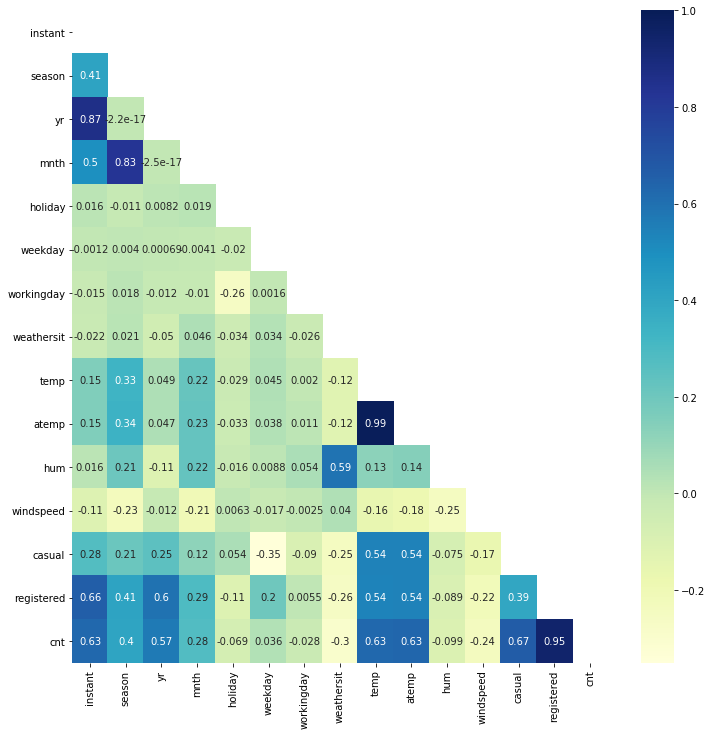

In [29]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='YlGnBu', annot = True)

plt.show()

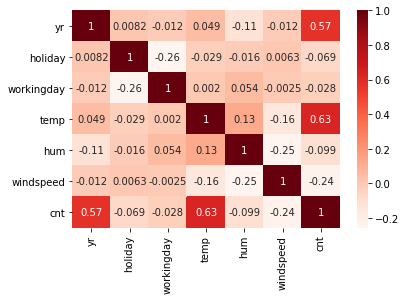

In [30]:
sns.heatmap(df1.corr(),annot=True,cmap='Reds')

## Visualizing categorical variables

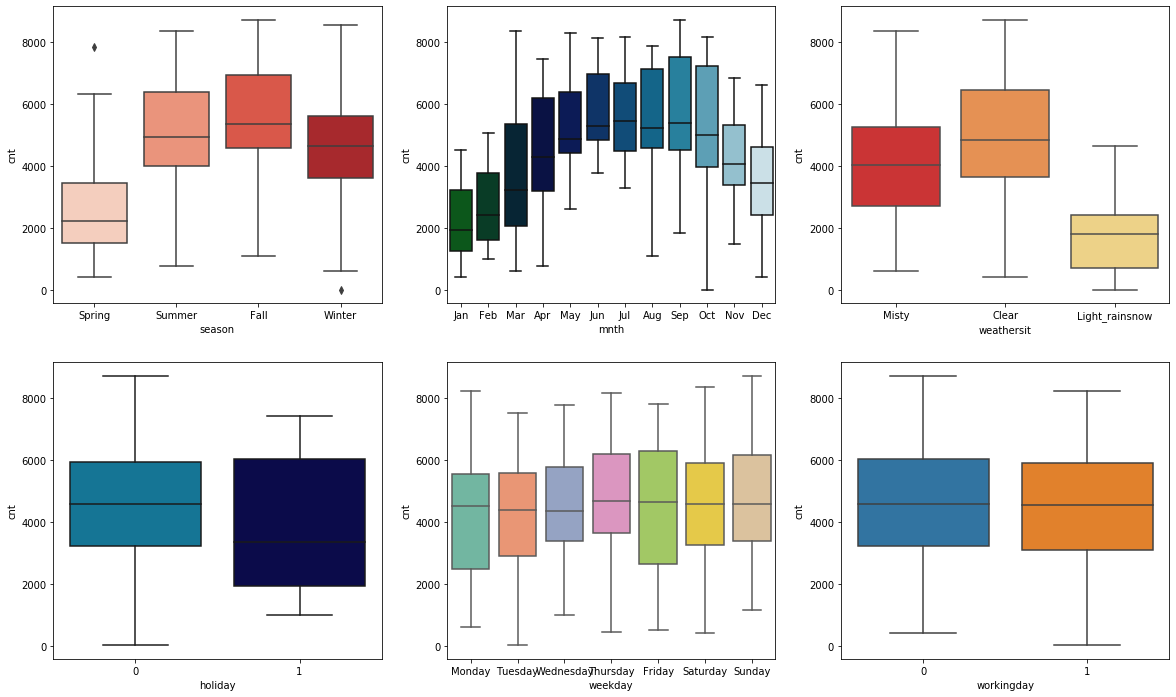

In [31]:
plt.figure(figsize=(20,12))
# boxplot for season vs cnt
plt.subplot(2,3,1)
sns.boxplot(x='season',y ='cnt',data = df1,palette='Reds')
# boxplot for mnth vs cnt
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1,palette='ocean')
# boxplot for weathersit vs cnt
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1,palette='YlOrRd_r')
# boxplot for holiday vs cnt
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df1,palette='ocean_r')
# boxplot for weekday vs cnt
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1,palette='Set2')
# boxplot for workingday vs cnt
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df1)
plt.show()

In [32]:
df1.yr = df1.yr.astype('int32')
df1.holiday = df1.holiday.astype('int32')
df1.workingday = df1.workingday.astype('int32')

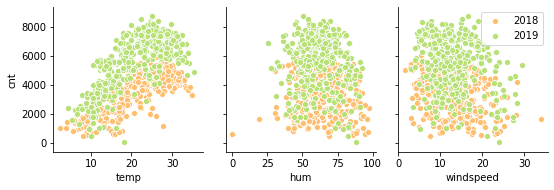

In [33]:
ax = sns.pairplot(x_vars=['temp', 'hum', 'windspeed'], y_vars=['cnt'] , data=df1, hue='yr', palette='RdYlGn')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

#### Inferences :
#### All the parameters have increased values in 2019 compared to 2018. Thus, year may become a key paratemeter in the model

## Step 4: Data Preparation 

### 4.1 Create Dummy variables

In [34]:
# Let's drop the first column from df1 using 'drop_first = True'
df2 = pd.get_dummies(df1[["season","weekday","mnth","weathersit"]],drop_first=True)

# Add the results to the original dataframe
df1 = pd.concat([df2, df1], axis = 1)

In [35]:
# drop the variables for which dummies are created
df1.drop(df1[["season","weekday","mnth","weathersit"]], axis = 1, inplace = True)

In [36]:
df1.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [37]:
df1.shape

(730, 29)

## Step 5: Splitting the Data into Train and Test Sets

In [38]:
# X are independant variables and y is dependant variable 'cnt'
X = df1.drop('cnt',axis=1)
y=df1['cnt']

In [39]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [40]:
X_train.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,hum,windspeed
704,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,10.489153,50.8750,11.708518
565,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,27.299153,84.4167,14.000789
185,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,30.613347,59.0417,8.459286
269,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,26.103347,88.5417,7.917457
178,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,30.510847,63.4167,9.666961


## Step 6 : Rescaling the Features

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
# scaling the numerical variables
var = ['temp','hum','windspeed']
X_train[var] = scaler.fit_transform(X_train[var])

In [43]:
X_train.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,hum,windspeed
704,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.245101,0.523136,0.314103
565,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0.755981,0.868038,0.384635
185,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.856704,0.607113,0.214126
269,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0.719639,0.910454,0.197454
178,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.853589,0.652100,0.251285


## Step-7 Building the Model using forward method

### 7.1 Building the model on the train data

In [44]:
# import linear regression using sklearn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# obtain coefficients of the linear model
regressor.coef_

array([  566.33255257,   622.88312328,  1362.33350295,  -281.6005214 ,
         349.71820562,   446.22796548,   -64.19297046,  -342.65056916,
        -105.40179744,   501.42909564,  -629.50300124,  -546.31982645,
        -704.87382864,   272.50189924,   279.88438981,     4.47157897,
         278.54107526,  -565.88090737,   114.77118172,   984.07134037,
       -1800.73324581,  -425.01871203,  2014.37688132,  -152.68218121,
         438.53761584,  3839.0162    , -1374.39174005, -1335.14153308])

In [46]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
season_Spring,566.332553
season_Summer,622.883123
season_Winter,1362.333503
weekday_Monday,-281.600521
weekday_Saturday,349.718206
weekday_Sunday,446.227965
weekday_Thursday,-64.192970
weekday_Tuesday,-342.650569
weekday_Wednesday,-105.401797
mnth_Aug,501.429096


In [47]:
# obtain intercept of linear model
regressor.intercept_

2033.7579247380104

### 7.2 Evaluating the model on the test data

In [48]:
# scaling the testing data
X_test[var] = scaler.transform(X_test[var])

In [49]:
# predicting values for the test data
y_pred = regressor.predict(X_test)

In [50]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
591,7347,6740.180476
455,6041,4788.854831
226,4338,4250.685114
131,4864,4044.443004
232,3873,4037.298810
254,4713,4989.096766
363,2999,2416.951083
172,4507,4564.905765
551,6207,7372.153621
54,1807,1496.454291


In [51]:
# model evaluation based on following parameters
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 627.5467713236586
Mean Squared Error: 710735.7735912912
Root Mean Squared Error: 843.0514655649981


In [52]:
# calculate r2
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7762247195749093

<function matplotlib.pyplot.show(*args, **kw)>

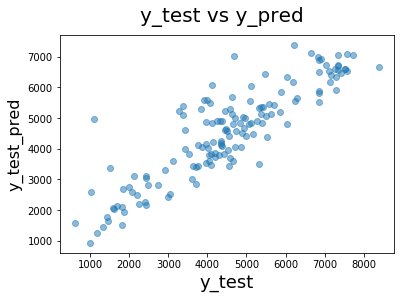

In [53]:
#plot y_test vs y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show

In [54]:
# calculate r2 and adjusted_r2 for training data
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8380111550159774 0.8298387448185853


In [55]:
# calculate r2 and adjusted_r2 for testing data
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7762247195749095 0.7226716610116399


### Residual analysis for train data

Text(0.5, 0, 'Errors')

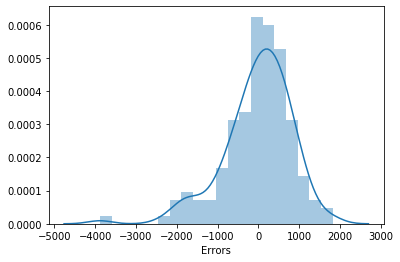

In [56]:
# distribution of error terms
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=20)
plt.xlabel("Errors")

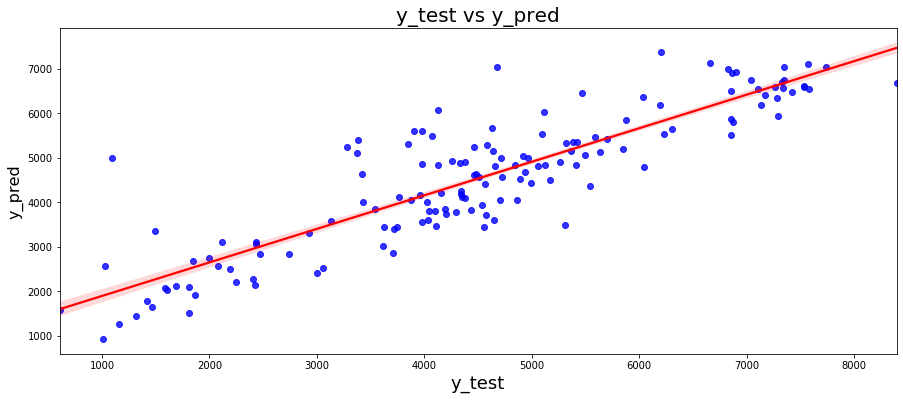

In [57]:
# regression line for y_test vs y_pred
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16)  
plt.show()

In [58]:
df1.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


### 7.3 Building the Model using Recursive Feature Elimination RFE
##### RFE is an efficient approach for eliminating features from a training dataset for feature selection.

In [59]:
# splitting dataset
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [60]:
df_train.shape

(584, 29)

In [61]:
df_test.shape

(146, 29)

In [62]:
y_train =df_train.pop("cnt")
X_train =df_train

In [63]:
X_train.shape , y_train.shape

((584, 28), (584,))

In [64]:
X_train.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,hum,windspeed
367,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,6.150000,44.1250,24.499957
648,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,17.835000,46.3333,12.166932
44,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,17.015000,37.5833,27.999836
705,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,13.154153,76.4167,8.750200
379,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,6.833347,41.9167,16.834286


In [65]:
y_train.head()

367    2236
648    7570
44     1913
705    5008
379    2311
Name: cnt, dtype: int64

### 7.4 Scaling the training data

In [66]:
from sklearn.preprocessing import MinMaxScaler
# 1. Instantiate an object
scaler = MinMaxScaler()
# Create a list of only numeric variables
num_var = ['temp','hum','windspeed']
# fit the data
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,hum,windspeed
367,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.113228,0.454701,0.695175
648,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.468352,0.477458,0.299450
44,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.443431,0.387290,0.807474
705,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.326094,0.787463,0.189819
379,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.133996,0.431945,0.449210


### 7.5 Fit the model using RFE 

In [67]:
# select 15 best features basaed on RFE
lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [68]:
# support and ranking of selected variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 9),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weathersit_Light_rainsnow', True, 1),
 ('weathersit_Misty', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### 7.6 Select the 15 features which are selected by RFE

In [69]:
# selected features
selected_features  = X_train.columns[rfe.support_]
selected_features 

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light_rainsnow', 'weathersit_Misty', 'yr', 'holiday',
       'temp', 'hum', 'windspeed'],
      dtype='object')

In [70]:
col = X_train.columns[~rfe.support_]
col

Index(['weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'workingday'],
      dtype='object')

In [71]:
X_train_rfe = X_train[selected_features]

In [72]:
X_train_rfe.shape

(584, 15)

### 7.7 Model Building Using stats model

### 7.7.1 Model 1

In [73]:
# adding constant to training data
X_train_sm =sm.add_constant(X_train_rfe)

# create  model
lr = sm.OLS(y_train,X_train_sm)

# fit the model
lr_model_1 =lr.fit()

# Summary of the model
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.71e-222
Time:                        17:54:07   Log-Likelihood:                -4702.6
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     568   BIC:                             9507.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2787.0219    296.248      9.408      0.000    2205.146    3368.898
season_Spring              -613.9275    170.641     -3.598      0.000    -949.091    -278.764
season_Summer               351.5191    122.555      2.868      0.004     110.804     592.234
season_Winter               948.9590    140.360      6.761      0.000     673.271    1224.647
mnth_Dec                   -393.9635    136.823     -2.879      0.004    -662.705    -125.222
mnth_Jan                   -359.8489    144.554     -2.489      0.013    -643.774     -75.924
mnth_Jul                   -476.9462    148.505     -3.212      0.001    -768.633    -185.259
mnth_Nov                   -474.6275    152.169     -3.119      0.002    -773.511    -175.744
mnth_Sep                    576.3572    135.103      4.266      0.000     310.995     841.720
weathersit_Light_rainsnow -2182.0145    218.859     -9.970      0.000   -2611.887   -1752.142
weathersit_Misty           -474.4607     84.948     -5.585      0.000    -641.312    -307.610
yr                         1978.1382     64.941     30.460      0.000    1850.584    2105.693
holiday                    -810.8373    198.311     -4.089      0.000   -1200.350    -421.324
temp                       4209.7791    298.541     14.101      0.000    3623.399    4796.159
hum                       -1363.7610    310.000     -4.399      0.000   -1972.647    -754.875
windspeed                 -1583.5349    208.189     -7.606      0.000   -1992.448   -1174.621
==============================================================================
Omnibus:                       87.012   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.812
Skew:                          -0.764   Prob(JB):                     6.82e-49
Kurtosis:                       5.604   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,31.19
12,temp,18.15
14,windspeed,4.70
0,season_Spring,4.43
2,season_Winter,3.80
1,season_Summer,2.81
9,weathersit_Misty,2.34
10,yr,2.11
6,mnth_Nov,1.74
4,mnth_Jan,1.71


### 7.7.2 Model 2

In [75]:
# drop hum variable as it has very high VIF
X_train_2 = X_train_rfe.drop("hum",axis =1)

In [76]:
X_train_sm_2 =sm.add_constant(X_train_2)

# create  model
lr = sm.OLS(y_train,X_train_sm_2)

# fit the model
lr_model_2 =lr.fit()

# Summary of the model
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.39e-219
Time:                        17:54:07   Log-Likelihood:                -4712.4
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     569   BIC:                             9520.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2130.0162    259.943      8.194      0.000    1619.451    2640.582
season_Spring              -680.3844    172.690     -3.940      0.000   -1019.572    -341.197
season_Summer               304.0202    124.031      2.451      0.015      60.405     547.635
season_Winter               847.5475    140.669      6.025      0.000     571.253    1123.842
mnth_Dec                   -463.7633    138.075     -3.359      0.001    -734.961    -192.565
mnth_Jan                   -412.8467    146.356     -2.821      0.005    -700.310    -125.383
mnth_Jul                   -430.4969    150.500     -2.860      0.004    -726.100    -134.894
mnth_Nov                   -490.8851    154.558     -3.176      0.002    -794.460    -187.310
mnth_Sep                    521.2462    136.673      3.814      0.000     252.801     789.692
weathersit_Light_rainsnow -2570.9617    203.410    -12.639      0.000   -2970.487   -2171.436
weathersit_Misty           -693.9132     69.859     -9.933      0.000    -831.126    -556.700
yr                         2018.4518     65.320     30.901      0.000    1890.154    2146.750
holiday                    -805.1649    201.480     -3.996      0.000   -1200.900    -409.430
temp                       3878.7286    293.524     13.214      0.000    3302.206    4455.251
windspeed                 -1330.4116    203.281     -6.545      0.000   -1729.684    -931.139
==============================================================================
Omnibus:                       87.660   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.972
Skew:                          -0.764   Prob(JB):                     5.17e-50
Kurtosis:                       5.644   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.34
13,windspeed,4.65
0,season_Spring,2.87
2,season_Winter,2.78
1,season_Summer,2.28
10,yr,2.08
6,mnth_Nov,1.69
4,mnth_Jan,1.62
5,mnth_Jul,1.61
9,weathersit_Misty,1.56


### 7.7.3 Model 3

In [78]:
# drop season_Summer due to its p-value
X_train_3 = X_train_2.drop("season_Summer",axis =1)

In [79]:
X_train_sm_3 =sm.add_constant(X_train_3)

# create  model
lr = sm.OLS(y_train,X_train_sm_3)

# fit the model
lr_model_3 =lr.fit()

# Summary of the model
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     234.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.05e-218
Time:                        17:54:08   Log-Likelihood:                -4715.5
No. Observations:                 584   AIC:                             9459.
Df Residuals:                     570   BIC:                             9520.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2517.4850    207.260     12.147      0.000    2110.398    2924.571
season_Spring              -969.9637    126.508     -7.667      0.000   -1218.442    -721.485
season_Winter               631.9248    110.251      5.732      0.000     415.376     848.473
mnth_Dec                   -522.2669    136.592     -3.824      0.000    -790.552    -253.982
mnth_Jan                   -462.6657    145.573     -3.178      0.002    -748.590    -176.741
mnth_Jul                   -565.3061    140.705     -4.018      0.000    -841.669    -288.943
mnth_Nov                   -557.3718    152.827     -3.647      0.000    -857.544    -257.200
mnth_Sep                    389.8525    126.273      3.087      0.002     141.834     637.871
weathersit_Light_rainsnow -2587.9453    204.183    -12.675      0.000   -2988.988   -2186.903
weathersit_Misty           -689.2897     70.140     -9.827      0.000    -827.053    -551.526
yr                         2026.2345     65.529     30.921      0.000    1897.527    2154.942
holiday                    -798.3177    202.344     -3.945      0.000   -1195.748    -400.887
temp                       3570.2719    266.342     13.405      0.000    3047.140    4093.403
windspeed                 -1298.1738    203.744     -6.372      0.000   -1698.355    -897.993
==============================================================================
Omnibus:                       88.724   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.698
Skew:                          -0.759   Prob(JB):                     8.92e-53
Kurtosis:                       5.747   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,4.73
12,windspeed,4.14
1,season_Winter,2.36
0,season_Spring,2.35
9,yr,2.07
5,mnth_Nov,1.69
3,mnth_Jan,1.61
8,weathersit_Misty,1.53
2,mnth_Dec,1.42
4,mnth_Jul,1.36


### 7.7.4 Model 4

In [81]:
# drop holiday as it is of no significance
X_train_4 = X_train_3.drop("holiday",axis =1)

In [82]:
X_train_sm_4 =sm.add_constant(X_train_4)

# create  model
lr = sm.OLS(y_train,X_train_sm_4)

# fit the model
lr_model_4 =lr.fit()

# Summary of the model
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.38e-216
Time:                        17:54:08   Log-Likelihood:                -4723.4
No. Observations:                 584   AIC:                             9473.
Df Residuals:                     571   BIC:                             9530.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2535.8768    209.834     12.085      0.000    2123.737    2948.017
season_Spring             -1000.8523    127.866     -7.827      0.000   -1251.997    -749.708
season_Winter               634.7092    111.647      5.685      0.000     415.421     853.997
mnth_Dec                   -550.1695    138.138     -3.983      0.000    -821.490    -278.849
mnth_Jan                   -486.0495    147.296     -3.300      0.001    -775.357    -196.742
mnth_Jul                   -571.6425    142.479     -4.012      0.000    -851.489    -291.796
mnth_Nov                   -630.9331    153.608     -4.107      0.000    -932.638    -329.228
mnth_Sep                    358.9175    127.627      2.812      0.005     108.242     609.593
weathersit_Light_rainsnow -2561.9871    206.663    -12.397      0.000   -2967.900   -2156.074
weathersit_Misty           -680.4454     70.992     -9.585      0.000    -819.883    -541.008
yr                         2021.9168     66.350     30.473      0.000    1891.596    2152.237
temp                       3541.8107    269.619     13.136      0.000    3012.245    4071.376
windspeed                 -1317.0971    206.269     -6.385      0.000   -1722.236    -911.958
==============================================================================
Omnibus:                       98.198   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.162
Skew:                          -0.829   Prob(JB):                     7.96e-60
Kurtosis:                       5.905   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.73
11,windspeed,4.14
1,season_Winter,2.36
0,season_Spring,2.34
9,yr,2.07
5,mnth_Nov,1.67
3,mnth_Jan,1.61
8,weathersit_Misty,1.52
2,mnth_Dec,1.42
4,mnth_Jul,1.36


##### Inferences :
- We get a p-value which is close to 0.000~ and VIF less than 5. We can proceed with this as our final model and make predictions on the test set.

## Step 8: Final Model

### 8.1 : Hypothesis testing

##### Hypothesis Testing States that
##### H0:B1=B2=...=Bn=0
##### H1: at least one Bi!=0

In [84]:
# display parameters of final model
lr_model_4.params

const                        2535.876839
season_Spring               -1000.852337
season_Winter                 634.709224
mnth_Dec                     -550.169497
mnth_Jan                     -486.049534
mnth_Jul                     -571.642475
mnth_Nov                     -630.933134
mnth_Sep                      358.917470
weathersit_Light_rainsnow   -2561.987118
weathersit_Misty             -680.445376
yr                           2021.916809
temp                         3541.810723
windspeed                   -1317.097053
dtype: float64

##### Conclusion: From the above summary of parameters we can conclude that all the coefficients are not equal to Zero, Hence we can conclude that we Reject the null hypothesis

### 8.2 F-Statistics :
##### F-Statistics is used for testing the overall significance of the Model.
- F-statistic:                     246.2
- Prob (F-statistic):          1.38e-216

##### Conclusion: The F-Statistics value of 246 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### 8.3 Best Fit Equation :
Total Users ( cnt ) = 2535.876839 - 1000.852337 ( season_Spring ) + 634.709224 ( season_Winter) -550.169497 ( mnth_Dec ) - 486.049534( mnth_Jan ) - 571.642475 ( mnth_Jul) - 630.933134 ( mnth_Nov) + 358.917470 ( mnth_Sep ) - 2561.987118 ( weathersit_Light_rainsnow) - 680.445376 (weathersit_Misty) + 2021.916809 (yr) + 3541.810723(temp) -1317.097053(windspeed)

## Step-9: Model Validation

#### Validating the assumption of Linear Regression Model :

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- No Autocorrelation in residuals.
- Normality of Errors

### 9.1 Linear Relationship

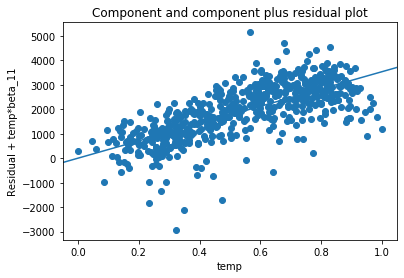

In [85]:
# checking for linear relationship
sm.graphics.plot_ccpr(lr_model_4, 'temp')
plt.show()

### 9.2 Homoscedasticity

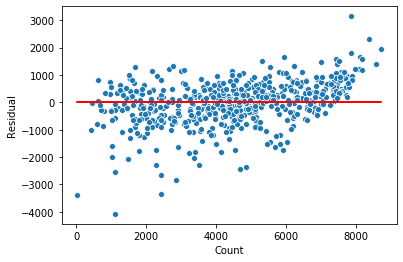

In [86]:
# checking for homoscedasticity
y_train_pred = lr_model_4.predict(X_train_sm_4)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### 7.3 Absence of Multicollinearity

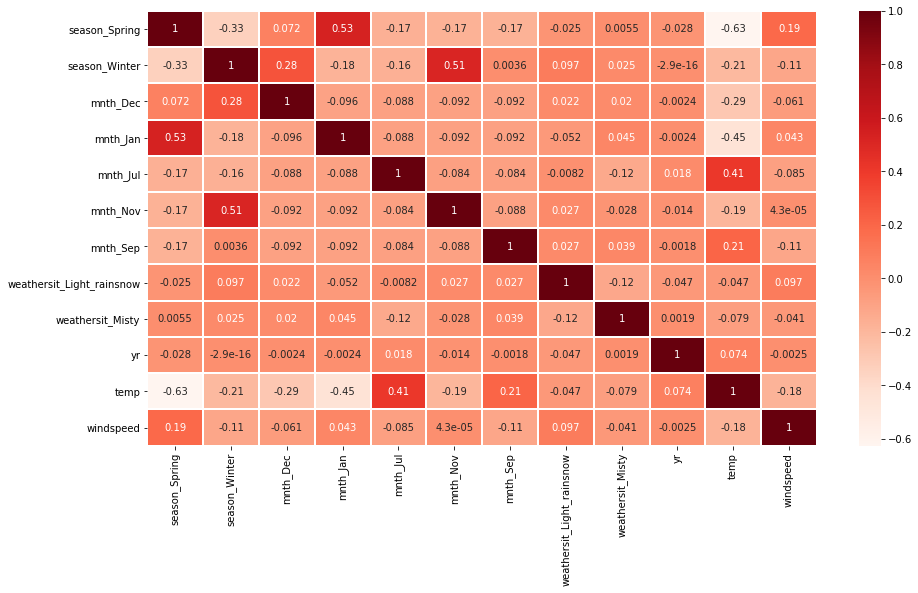

In [87]:
# checking for multicollinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_4.corr(),annot = True, cmap="Reds",linewidth =1)
plt.show()

In [88]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.73
11,windspeed,4.14
1,season_Winter,2.36
0,season_Spring,2.34
9,yr,2.07
5,mnth_Nov,1.67
3,mnth_Jan,1.61
8,weathersit_Misty,1.52
2,mnth_Dec,1.42
4,mnth_Jul,1.36


### 9.4 No Autocorrelation in residuals.
### To check No Autocorrelation in residuals we can Use Durbin-Watson Test. The test output values will be between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.
- DW = 2 would be the ideal case here (no autocorrelation)
- 0 < DW < 2 -> positive autocorrelation
- 2 < DW < 4 -> negative autocorrelation

##### From Our final Model Summary
- Durbin-Watson: 1.939

##### Conclusion: Our model's Durbin-Watson is 1.939 which is very close to 2. Hence we can conclude that there is almost no autocorrelation.

### 9.5 Normality of error


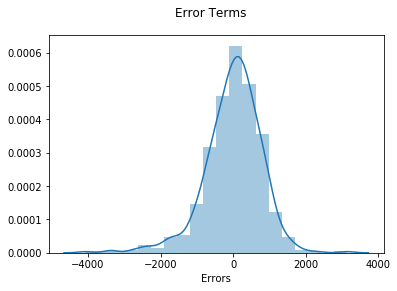

In [89]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

##### Inferences :
- The error terms on the train set are normally distributed.

### Step 10: Evaluating the model based on test data

### 10.1 Rescaling the testing data

In [90]:
# perform scaling on test data
num_vars  = ['temp','hum','windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0.831783,0.657364,0.084219,6043
535,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.901354,0.610133,0.153728,6211
299,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.511964,0.837699,0.334206,2659
221,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,4780
152,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.817246,0.314298,0.537414,4968


In [91]:
y_test = df_test.pop('cnt')
X_test = df_test

In [92]:
X_test.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light_rainsnow,weathersit_Misty,yr,holiday,workingday,temp,hum,windspeed
184,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0.831783,0.657364,0.084219
535,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.901354,0.610133,0.153728
299,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.511964,0.837699,0.334206
221,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.817246,0.314298,0.537414


### 10.2 Selecting only relevant columns

In [93]:
# selecting columns which were selected  by our final model
test_features=X_train_4.columns

X_test=X_test[test_features]

In [94]:
# adding a constant
X_test_lm = sm.add_constant(X_test)

X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      146 non-null    float64
 1   season_Spring              146 non-null    uint8  
 2   season_Winter              146 non-null    uint8  
 3   mnth_Dec                   146 non-null    uint8  
 4   mnth_Jan                   146 non-null    uint8  
 5   mnth_Jul                   146 non-null    uint8  
 6   mnth_Nov                   146 non-null    uint8  
 7   mnth_Sep                   146 non-null    uint8  
 8   weathersit_Light_rainsnow  146 non-null    uint8  
 9   weathersit_Misty           146 non-null    uint8  
 10  yr                         146 non-null    int32  
 11  temp                       146 non-null    float64
 12  windspeed                  146 non-null    float64
dtypes: float64(3), int32(1), uint8(9)
memory usage: 

### 10.3 Predicting and Evaluating values for test data

In [95]:
# predicted values vs actual values for test data
y_pred_lr = lr_model_4.predict(X_test_lm)

<function matplotlib.pyplot.show(*args, **kw)>

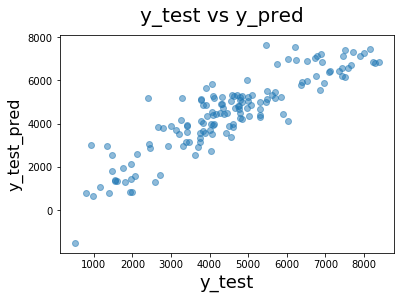

In [96]:
fig = plt.figure()
plt.scatter(y_test, y_pred_lr, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show

In [97]:
# calculate r2 score
r2 = round(r2_score(y_test, y_pred_lr),4)
r2

0.7895

In [98]:
# calculate adjusted r2
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7705

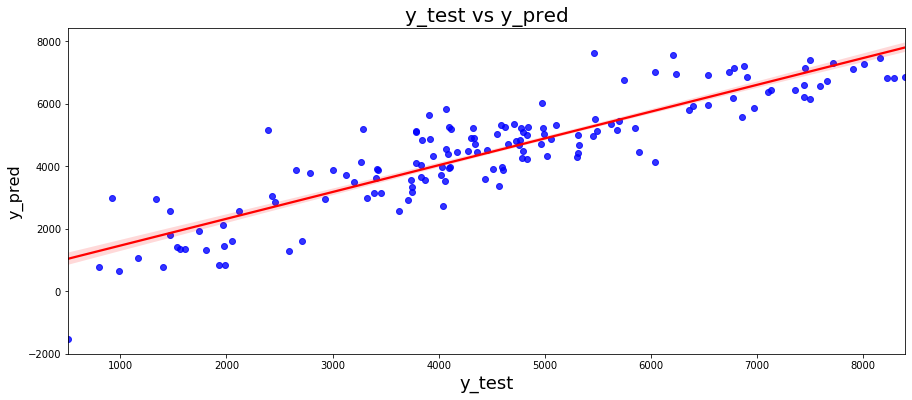

In [99]:
# plot regression line
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_pred_lr, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16)  
plt.show()

In [100]:
# evaluate metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 670.1702997400628
Mean Squared Error: 715018.5887806914
Root Mean Squared Error: 845.5877179693963


### Residual analysis for test data

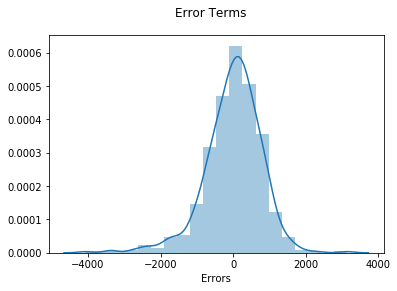

In [101]:
res1 = y_test-y_pred_lr
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

##### Inferences :
- The error terms on the test set are normally distributed.

## Conclusion:

- The variables temperature(temp), year(yr) and weather situation snow/lightrain (weathersit_light_rainsnow) are important for predicting the count of bike rentals 
- The error terms are normally distributed which shows that the model is working as expected
- Linear relationship is seen between variables and target variable
- Thus, this model can be used to predict count of bike rentals.